<a href="https://colab.research.google.com/github/Gr3gP/Misc-Projects/blob/main/RL_MAB_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-Arm Bandit Problem

https://peterroelants.github.io/posts/multi-armed-bandit-implementation/

In the MABP we try to maximize our gain over time by 'gambling on slot machines (or bandits)' that have different but unkknown expeceted outcomes. 


We are goin to simualte three bandits each with an underlying probability of winning stored in p_bandits. The pull(i) method will 'pull the arm' of the bandiit i, and randomly decides if the pull was a win(1) or not (0). 

In [ ]:
%matplotlib inline
%config InlineBAckend.figure_formats = ['svg']

import numpy as np
import scipy
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

In [ ]:
#define the MAB
nb_bandits = 3 #number of bandits
#true prob of winning fotr each bandit
p_bandits = [0.45, 0.55, 0.60]

def pull(i):
  '''pull the arm of bandit with i and return 1 if win, else return 0
  '''
  if np.random.rand() < p_bandits[i]:
      return 1
  else:
      return 0

In [ ]:
#def plot functions
#iterations to plot
plots = [1,2,5,10,25,50,100,200,500,1000]


def plot(priors, step, ax):
    '''plot the priors for the current step'''
    plot_x = np.linspace(0.001, .99, 100)
    for prior in priors:
        y = prior.pdf(plot_x)
        p = ax.plot(plot_x, y)
        ax.fill_between(plot_x, y, 0, alpha=0.2)
    ax.set_xlim([0,1])
    ax.set_ylim(bottom=0)
    ax.set_title(f'Priors at step {step:d}')

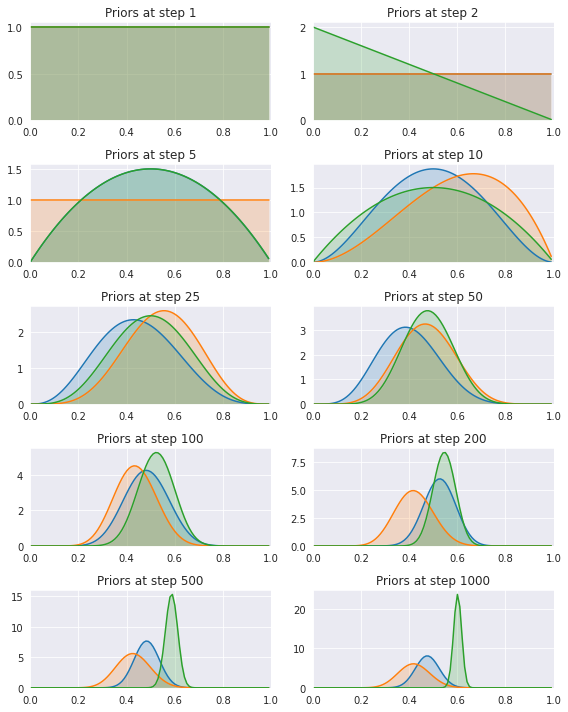

In [ ]:
                                                                                                                                                                            #simualte mab process and update posteriors

#setup plot
fig, axs = plt.subplots(5,2, figsize=(8,10))
axs = axs.flat

#number of trials and wins will represent the prior for each bandit with the
#help of the beta dist. 
trials = [0,0,0] #number of times we tried each bandit
wins = [0,0,0] #number of wins for each bandit                   
             
n = 1000                                                                                           
#run the trial for n steps
for step in range(1, n+1):
    #define prior based on current observations
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, wins)]
    #plot prior
    if step in plots:
        plot(bandit_priors, step, next(axs))
    #sample a probability theta for each bandit
    theta_samples = [d.rvs(1) for d in bandit_priors]
    #chose a bandit
    chosen_bandit = np                                       
plt.show()

In [18]:
# Print final outcome and number of test needed per bandit
emperical_p_bandits = [(1+w) / (1+t) for t, w in zip(trials, wins)]
for i in range(nb_bandits):
    print((f'True prob={p_bandits[i]:.2f};  '
           f'Emperical prob={emperical_p_bandits[i]:.2f};  '
           f'Trials={trials[i]:d}'))
#

True prob=0.45;  Emperical prob=0.48;  Trials=101
True prob=0.55;  Emperical prob=0.43;  Trials=55
True prob=0.60;  Emperical prob=0.60;  Trials=844
